In [1]:
# Support Vector Machines for facial recognition using SciKit-Learn dataset

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('seaborn-v0_8-whitegrid')

In [5]:
# import dataset (Labeled Faces in the Wild)
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


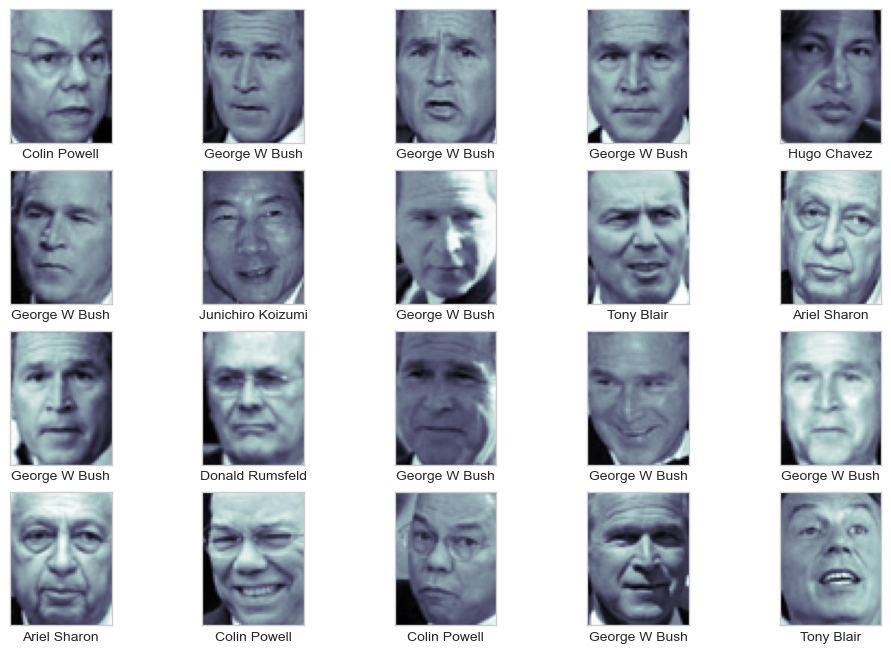

In [7]:
fig, ax = plt.subplots(4, 5, figsize=(12, 8))
for i,axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [9]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA #using Principal Component Analysis to extract 150 main components
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=250, whiten=True,
          svd_solver='randomized', random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced') #radial basic function which is based on the similarity relationship between each pair of features (extracted by PCA)
model = make_pipeline(pca, svc)

In [11]:
# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=42)

In [13]:
# Crossvalidation
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1,5,10,50,100],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

CPU times: user 4min 10s, sys: 8.26 s, total: 4min 19s
Wall time: 33.8 s
{'svc__C': 50, 'svc__gamma': 0.001}


In [15]:
# Label estimation for test data
model = grid.best_estimator_
yfit = model.predict(X_test)

Text(0.5, 0.98, 'Predicting a surname\nCorrect prediction - green\nIncorrect prediction - red')

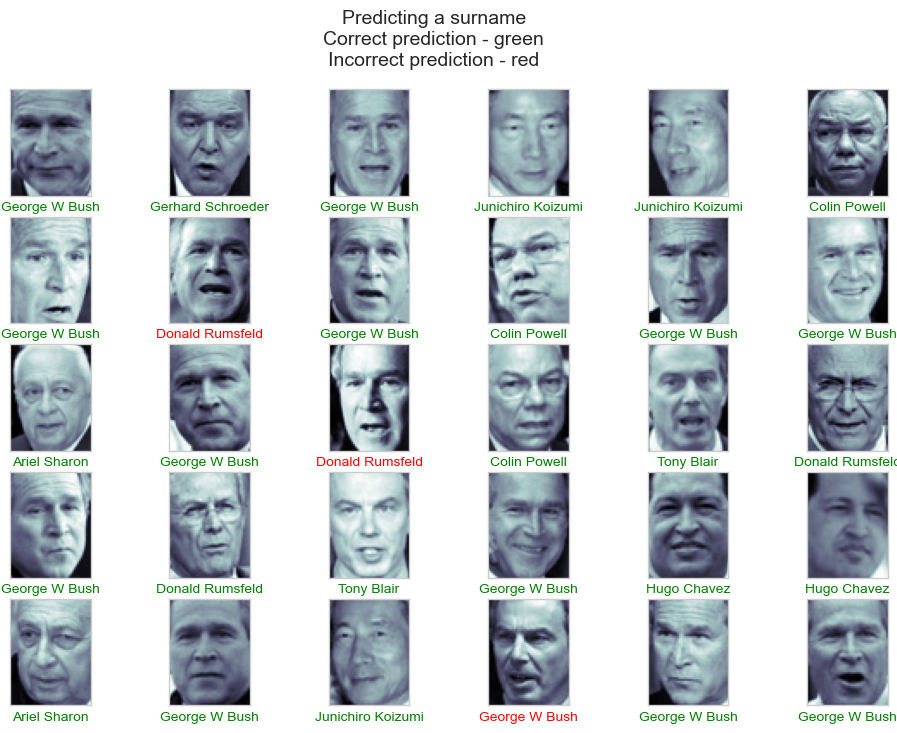

In [17]:
# Trained data visualization with label estimation
fig, ax = plt.subplots(5, 6, figsize=(12, 8))
for i,axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(faces.target_names[yfit[i]], color='green' if yfit[i] == y_test[i] else 'red')
fig.suptitle('Predicting a surname\nCorrect prediction - green\nIncorrect prediction - red', size=14)

In [19]:
# Efficence od estimator
from sklearn.metrics import classification_report

print(classification_report(y_test, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.71      0.80      0.75        15
     Colin Powell       0.78      0.91      0.84        68
  Donald Rumsfeld       0.81      0.68      0.74        31
    George W Bush       0.85      0.86      0.85       126
Gerhard Schroeder       0.62      0.70      0.65        23
      Hugo Chavez       0.93      0.65      0.76        20
Junichiro Koizumi       1.00      0.92      0.96        12
       Tony Blair       0.86      0.74      0.79        42

         accuracy                           0.81       337
        macro avg       0.82      0.78      0.79       337
     weighted avg       0.82      0.81      0.81       337



Text(120.78333333333332, 0.5, 'False labels')

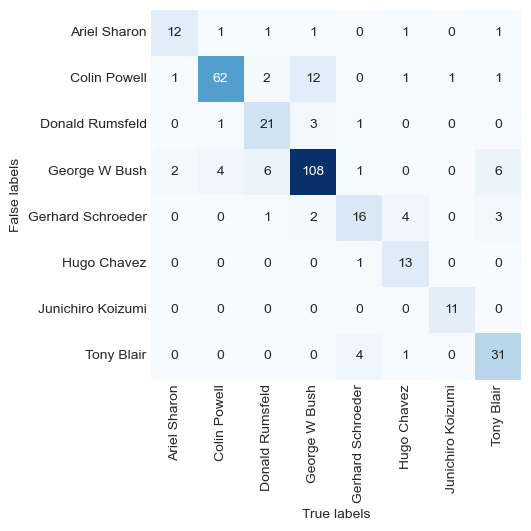

In [21]:
# Confusion matrix for summary
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('True labels')
plt.ylabel('False labels')